# Scores y rankings

- Score: Calificación numérica que se calcula a partir de varios atributos (columnas) a cada caso (renglón).
- Ranking: Ordenamiento de los casos (renglones) de acuerdo a algún criterio.

## Scores
- Generalmente son combinaciones lineales de los atributos.

**Ejemplos**:
- Calificaciones de cada persona en la universidad.
- Calificación de Steam, que agrega la historia, la jugabilidad, los personajes, etc.
- Índice de masa corporal: $\frac{\text{peso}}{\text{estatura}^2}$

In [1]:
import itertools
import pathlib

import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import pandas as pd
from scipy import stats
from scipy import special
import seaborn as sns

In [2]:
nfl = pd.read_csv('Datos/Biometricos/nfl.csv')
nfl = nfl[['Height (inches)', 'Weight (lbs)']]
nfl.columns = ['estatura', 'peso']
nfl['estatura'] = 2.54*nfl['estatura']/100
nfl['peso'] = nfl['peso']/2.205
nfl = nfl.dropna()
nfl.head()

,estatura,peso
0,1.8034,83.900227
1,1.7780,106.575964
2,1.8796,104.308390
3,1.8542,115.646259
4,1.9558,138.321995


In [3]:
nfl['imc'] = nfl['peso']/nfl['estatura']**2
nfl.head()

,estatura,peso,imc
0,1.8034,83.900227,25.797582
1,1.7780,106.575964,33.712872
2,1.8796,104.308390,29.524896
3,1.8542,115.646259,33.637091
4,1.9558,138.321995,36.161161


In [4]:
def categorizar(imc):
    if imc < 18.5:
        return 'Bajo de peso'
    if imc < 25:
        return 'Normal'
    if imc < 30:
        return 'Sobrepeso'
    return 'Obesidad'

In [5]:
nfl['status'] = nfl['imc'].map(categorizar)
nfl.head()

,estatura,peso,imc,status
0,1.8034,83.900227,25.797582,Sobrepeso
1,1.7780,106.575964,33.712872,Obesidad
2,1.8796,104.308390,29.524896,Sobrepeso
3,1.8542,115.646259,33.637091,Obesidad
4,1.9558,138.321995,36.161161,Obesidad


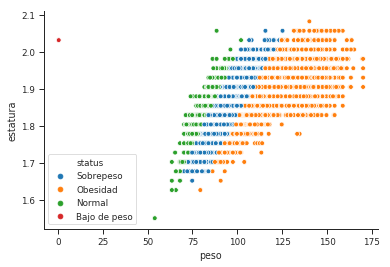

In [6]:
sns.set_style('ticks')
sns.set_context('paper')
sns.scatterplot(x='peso', y='estatura', hue='status', data=nfl)
sns.despine()

In [7]:
nba = pd.read_csv('Datos/Biometricos/nba.csv', index_col=0)
nba = nba[['player_height', 'player_weight']]
nba.columns = ['estatura', 'peso']
nba['estatura'] /= 100
nba['imc'] = nba['peso']/nba['estatura']**2
nba['status'] = nba['imc'].map(categorizar)
nba.head()

,estatura,peso,imc,status
0,1.9558,90.71840,23.716276,Normal
1,2.1082,106.59412,23.983338,Normal
2,2.0828,106.59412,24.571864,Normal
3,2.1082,111.13004,25.003906,Sobrepeso
4,2.0574,106.59412,25.182322,Sobrepeso


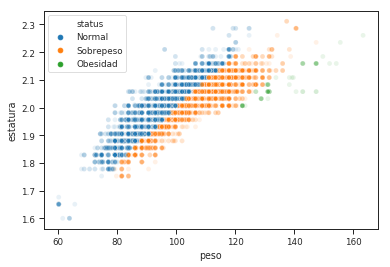

In [8]:
sns.scatterplot(x='peso', y='estatura', hue='status', alpha=0.1, data=nba)

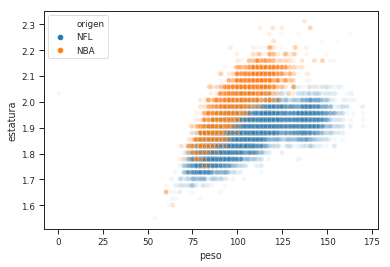

In [9]:
nfl['origen'] = 'NFL'
nba['origen'] = 'NBA'
sns.scatterplot(x='peso', y='estatura', hue='origen', alpha=0.05, data=pd.concat([nfl, nba]))

## Estándares y proxys

- Estándar dorado: aquellos datos que consideramos como verdad absoluta y tangible. En el caso del IMC se trata de la medición exacta de la grasa corporal
- Proxy (representante): son datos que aproximan una verdad, como medir qué tan importante es una persona por el número de enlaces en su página de Wikipedia.

## Scores vs. rankings

In [10]:
nfl['imc'].sort_values(ascending=False)

866      46.863283
935      46.168557
9753     46.103925
14133    46.103925
9287     45.968325
15042    45.638153
5890     44.988752
13863    44.929189
14794    44.929189
438      44.863783
861      44.849455
13321    44.747927
4903     44.460443
2323     44.287343
11599    44.287343
6485     44.057994
10760    44.030605
10803    43.934328
5112     43.926084
4320     43.812626
10789    43.739065
3611     43.739065
1056     43.739065
14025    43.645498
91       43.530353
7317     43.530353
11674    43.530353
4660     43.527529
14723    43.517129
14914    43.388760
           ...    
12150    22.373963
13165    22.373963
12723    22.373963
16965    22.373963
5441     22.373963
17025    22.336225
10110    22.311422
10645    22.311422
4278     22.311422
9896     22.311422
16283    22.238364
8090     22.236150
11401    22.236150
9244     22.147109
15378    22.032530
12426    21.967164
16942    21.967164
2399     21.952722
7828     21.923122
4514     21.893083
10654    21.891153
4913     21.

### Z-score

Es una forma de normalizar los datos de tal forma que la distribución tenga media 0 y desviación estándar 1.
$$Z = \frac{X - \mu}{\sigma}$$

In [11]:
def zscore(x):
    mu = sum(x)/len(x)
    std = (sum((x_i - mu)**2 for x_i in x)/(len(x) - 1))**0.5
    z = [(x_i - mu)/std for x_i in x]
    return z

In [12]:
stats.zscore(nfl['estatura'])

array([-0.97316872, -1.36109617,  0.19061363, ..., -0.58524127,
       -0.19731382, -0.19731382])

### Elo Rankings

La función *expit* es una función que transforma del intervalo $(-\infty, \infty)$ al $(0, 1)$. Se define por:
$$f_c(x) = \frac{1}{1 + \mathrm{e}^{-c\,x}}$$

Su inversa es *logit*.

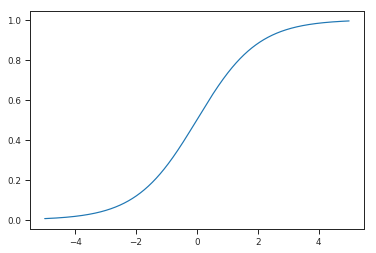

In [13]:
c = 1
x = c*np.linspace(-5, 5, num=1000)
y = special.expit(x)
plt.plot(x, y)

In [14]:
partidos = pathlib.Path('Datos/Partidos/')

In [15]:
tablas = []
for archivo in partidos.iterdir():
    if archivo.suffix != '.csv': continue
    tablas.append(pd.read_csv(archivo, parse_dates=['Date'], dayfirst=True))
df = pd.concat(tablas)
df = df[['Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG']]
df = df.sort_values('Date')
df.head()

,Date,HomeTeam,AwayTeam,FTHG,FTAG
0,2008-08-30,Espanol,Valladolid,1,0
1,2008-08-30,Valencia,Mallorca,3,0
0,2008-08-30,Espanol,Valladolid,1,0
1,2008-08-30,Valencia,Mallorca,3,0
3,2008-08-31,Ath Madrid,Malaga,4,0


In [16]:
df.tail()

,Date,HomeTeam,AwayTeam,FTHG,FTAG
226,2019-02-10,Leganes,Betis,3,0
227,2019-02-10,Sevilla,Eibar,2,2
228,2019-02-10,Valencia,Sociedad,0,0
229,2019-02-11,Alaves,Levante,2,0
229,2019-02-11,Alaves,Levante,2,0


In [17]:
def sgn(x):
    if x > 0:
        return 1
    if x < 0:
        return -1
    return 0

df['S'] = (df['FTHG'] - df['FTAG']).map(sgn)
df.head()

,Date,HomeTeam,AwayTeam,FTHG,FTAG,S
0,2008-08-30,Espanol,Valladolid,1,0,1
1,2008-08-30,Valencia,Mallorca,3,0,1
0,2008-08-30,Espanol,Valladolid,1,0,1
1,2008-08-30,Valencia,Mallorca,3,0,1
3,2008-08-31,Ath Madrid,Malaga,4,0,1


In [18]:
jugadores = set(df['HomeTeam']).union(df['AwayTeam'])

In [19]:
def actualizar_ranking(A, B, S):
    mu = 2*special.expit(r[A] - r[B]) - 1
    (r[A], r[B]) = (r[A] + k*(S - mu), r[B] + k*(mu - S))

In [20]:
r_inicial, k = 0, .01

r = dict.fromkeys(jugadores, r_inicial)
for (i, (A, B, S)) in df[['HomeTeam', 'AwayTeam', 'S']].iterrows():
    actualizar_ranking(A, B, S)

pd.Series(r).sort_values(ascending=False)

Barcelona      1.591093
Real Madrid    1.329159
Ath Madrid     1.073491
Sevilla        0.478696
Valencia       0.421974
Villarreal     0.295338
Ath Bilbao     0.228752
Sociedad       0.188345
Alaves         0.122490
Eibar          0.051805
Espanol        0.035388
Betis          0.014928
Getafe         0.009695
Girona         0.005108
Celta         -0.016605
Leganes       -0.076903
Huesca        -0.106755
Elche         -0.138772
Mallorca      -0.139423
Levante       -0.155764
Tenerife      -0.168681
Xerez         -0.171551
Hercules      -0.191535
Vallecano     -0.206901
Numancia      -0.219894
Recreativo    -0.224430
Valladolid    -0.241690
Zaragoza      -0.299326
Malaga        -0.320303
Cordoba       -0.328618
Santander     -0.352861
Sp Gijon      -0.363489
La Coruna     -0.366203
Las Palmas    -0.400461
Osasuna       -0.417780
Almeria       -0.422289
Granada       -0.516031
dtype: float64

## Uso de scores para ordenar (generar rankings) en Python

In [21]:
class A:
    def __repr__(self):
        return repr(self.__dict__)

a, b, c = A(), A(), A()
a.x, a.y = -1, 1
b.x, b.y = 0, 0
c.x, c.y = 1, -1

sorted([a, b, c], key=lambda obj: 2*obj.x + obj.y)

[{'x': -1, 'y': 1}, {'x': 0, 'y': 0}, {'x': 1, 'y': -1}]

In [22]:
d = {'a': 3, 'b': 8, 'c':-1}
sorted(d.keys(), key=d.get)

['c', 'a', 'b']

## Mezcla de rankings

In [23]:
def borda(rankings, pesos=None):
    if pesos is None:
        cuantiles = np.linspace(0, 1, num=len(rankings[0]) + 2)[1:-1]
        pesos = list(stats.norm(0, 1).ppf(cuantiles))
    
    mezcla = dict.fromkeys(rankings[0], 0)
    for ranking in rankings:
        for (elemento, peso) in zip(ranking, pesos):
            mezcla[elemento] += peso
    return sorted(mezcla.keys(), key=mezcla.get)

In [24]:
rankings = [
    ['A', 'C', 'B', 'D', 'E'],
    ['B', 'A', 'C', 'D', 'E'],
    ['A', 'B', 'C', 'E', 'D'],
    ['A', 'B', 'D', 'C', 'E']
]
pesos = [1, 2, 3, 4, 5]

borda(rankings, pesos)

['A', 'B', 'C', 'D', 'E']

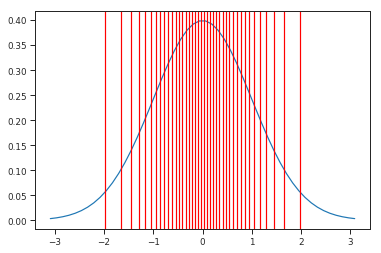

In [25]:
elementos = 40
N = stats.norm(0, 1)
p = np.linspace(0, 1, num=(elementos + 2))[1:-1]
x = N.ppf(p)
y = N.pdf(x)

# Graficar gaussiana
a, b = N.ppf([0.001, 0.999])
x_grafica = np.linspace(a, b)
y_grafica = N.pdf(x_grafica)
plt.plot(x_grafica, y_grafica)
for xi in x:
    plt.axvline(xi, color='red')

### Métodos de ranking basados en grafos

Un grafo dirigido representa los votos de qué elementos van antes que otros en un ranking. Específicamente, la arista $(u, v)$ representa que hay una restricción para que $u$ preceda a $v$ en el ranking.

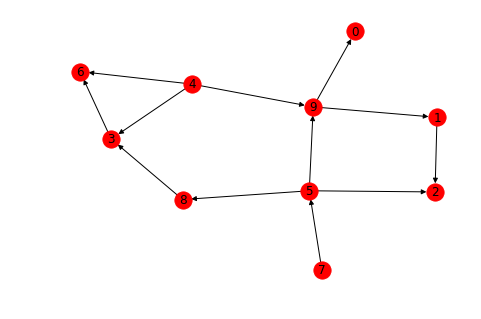

In [26]:
G = nx.gnm_random_graph(10, 12)
H = nx.DiGraph()
H.add_nodes_from(G.nodes)
for u, v in G.edges:
    if np.random.randint(0, 2) == 1:
        H.add_edge(u, v)
    else:
        H.add_edge(v, u)

pos = nx.kamada_kawai_layout(G)
nx.draw(H, pos, with_labels=True)

In [27]:
tiempo = iter(itertools.count(1))
next(tiempo)

1

In [28]:
next(tiempo)

2

In [29]:
next(tiempo)

3

In [30]:
def profundidad(G):                    # Recorrido en prof.
    def visitar(u):
        pre[u] = next(tiempo)          # Descubrimos u
        for v in G.neighbors(u):       # Para cada vecino de u
            if v in pre: continue      # ...sin descubrir
            visitar(v)                 # visitar recursivamente.
        post[u] = next(tiempo)         # Finalizamos u
    
    # Inicializar variables del recorrido
    tiempo = itertools.count()
    pre, post = {}, {}

    # Buscar nodos donde iniciar el recorrido
    for r in G.nodes:
        if r in pre: continue
        visitar(r)
    
    return pre, post

,pre,post
0,0,1
1,2,5
2,3,4
3,6,9
4,10,13
5,14,17
6,7,8
7,18,19
8,15,16
9,11,12


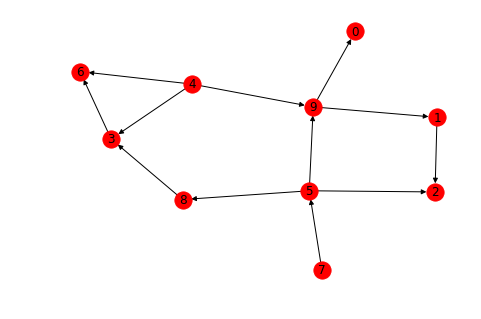

In [31]:
nx.draw(H, pos, with_labels=True)
pre, post = profundidad(H)
pd.DataFrame({'pre': pre, 'post': post})

In [32]:
parentesis = [None]*(len(G.nodes)*2)
for u, t in pre.items():
    parentesis[t] = f'({u}'
for u, t in post.items():
    parentesis[t] = f'{u})'
print(*parentesis)

(0 0) (1 (2 2) 1) (3 (6 6) 3) (4 (9 9) 4) (5 (8 8) 5) (7 7)


In [33]:
def toposort(G):
    pre, post = profundidad(G)
    return sorted(post, key=post.get)

toposort(H)

[0, 2, 1, 6, 3, 9, 4, 8, 5, 7]

## El teorema de imposibilidad de Arrow
Denotamos con $A < B$ que el candidato $A$ es preferible a $B$. Un sistema de votación ideal tendría las siguientes características:
- **Completez**: Dados dos candidatos $A$ y $B$, el sistema debe decir si $A < B$, $B < A$ ó $A = B$.
- **Transitividad**: Si $A < B$ y  $B < C$ entonces $A < C$.
- Si todo individuo prefiere $A$ sobre $B$, entonces el sistema rankea $A < B$.
- El sistema no debe de depender sólo de una persona (un dictador).
- La preferencia de $A$ comparada con $B$ debería ser independiente de las demás alternativas como $C$.

El teorema de la imposibilidad de Arrow establece que tal sistema no existe.

Votante | Rojo | Verde | Azul
--------|------|-------|------
**x**   |   1  |   2   |  3
**y**   |   2  |   3   |  1
**z**   |   3  |   1   |  2

En esta tabla observamos en cada renglón un ordenamiento de los candidatos **Rojo**, **Verde** y **Azul**.
- **Rojo** < **Verde** por mayoría de votos (**x**  y __y__).
- **Verde** < **Azul** por mayoría de votos (**x**  y __z__).
- Pero **Azul** < **Rojo** según los votos de la mayoría (**y** y __z__)